# Práctica 2: Solución a un problema de regresión

# Regresión lineal simple

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [2]:
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [3]:
warnings.filterwarnings("ignore")

### a) Importar la base de datos

In [4]:
# Cargar el dataset
diabetes = pd.read_excel('diabetes.xlsx')

In [5]:
diabetes.drop(columns=['y'], inplace=True)

### b) Explorar los datos

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   edad             442 non-null    int64  
 1   sexo             442 non-null    int64  
 2   imc              442 non-null    float64
 3   blood_pressure   442 non-null    float64
 4   total_serum_col  442 non-null    int64  
 5   ldl              442 non-null    float64
 6   hdl              442 non-null    float64
 7   total_col        442 non-null    float64
 8   ltg              442 non-null    float64
 9   glucosa          442 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 34.7 KB


In [7]:
diabetes.describe()

,edad,sexo,imc,blood_pressure,total_serum_col,ldl,hdl,total_col,ltg,glucosa
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [8]:
corr = diabetes.corr()
corr

,edad,sexo,imc,blood_pressure,total_serum_col,ldl,hdl,total_col,ltg,glucosa
edad,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sexo,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
imc,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
blood_pressure,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
total_serum_col,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
ldl,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
hdl,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
total_col,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
ltg,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
glucosa,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


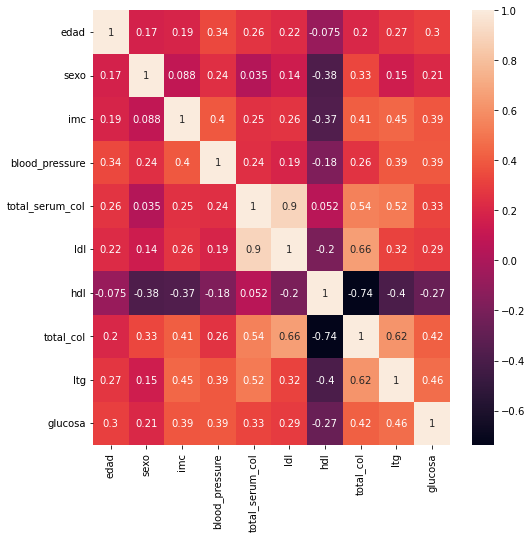

In [9]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot=True)
plt.show()

### Modelo de regresión lineal

In [10]:
#convertir pandas.series en numpy.array

imc = diabetes.imc.to_numpy()
glucosa = diabetes.glucosa.to_numpy()

In [11]:
# definir las variables x e y 
X = imc
Y = glucosa

#### Opción 1. Scikit learn

In [12]:
# Modelo de regresión Lineal
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)
rls=linear_model.LinearRegression()
modelo=rls.fit(np.reshape(X_train,(-1,1)),Y_train)
Y_pred=rls.predict(np.reshape(X_test,(-1,1)))

In [13]:
# X_train: 265; X_test:177

In [14]:
# Datos de la regresión lineal (b1?)
print(rls.coef_)

[0.98541474]


In [15]:
# Datos de la regresión lineal (b0?)
print(rls.intercept_)

65.2194859153913


In [16]:
# Parámetros para prueba de hipótesis B1
error=Y_test-Y_pred
ds_error=error.std()
ds_X=X_test.std()
error_st=ds_error/np.sqrt(102)
t1=rls.coef_/(error_st/ds_X)
print(t1)

[4.67349693]


In [17]:
# Parámetros para prueba de hipótesis B0
media_X=X_test.mean()
media_XC=pow(media_X,2)
var_X=X_test.var()
to=rls.intercept_/(error_st*np.sqrt(1+(media_XC/var_X)))
print(to)

11.53522470119761


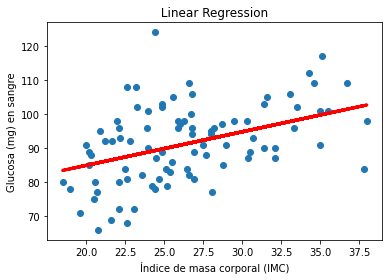

In [18]:
#%% Gráfica del modelo lineal
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred, color='r',linewidth=3)
plt.title(' Linear Regression ')
plt.xlabel('Índice de masa corporal (IMC)')
plt.ylabel('Glucosa (mg) en sangre')
plt.
plt.show()

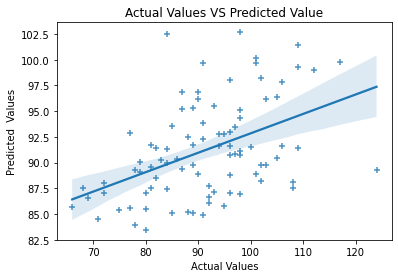

In [19]:
# Ajuste de la linea de regresión
plt.figure()
sns.regplot(Y_test,Y_pred, data=diabetes, marker='+')
plt.xlabel('Actual Values')
plt.ylabel('Predicted  Values')
plt.title('Actual Values VS Predicted Value')
plt.show()

#### Opción 2. Statsmodel

In [20]:
# Modelo de regresión lineal (statsmodel)
X_2=sm.add_constant(X_train,prepend=True)
rls_2=sm.OLS(Y_train,X_2)
modelo_2=rls_2.fit()
print(modelo_2.summary())
Y_pred_2=modelo_2.predict()
error_2=modelo_2.resid

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     55.72
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           6.66e-13
Time:                        16:47:40   Log-Likelihood:                -1337.4
No. Observations:                 353   AIC:                             2679.
Df Residuals:                     351   BIC:                             2687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.2195      3.528     18.487      0.0

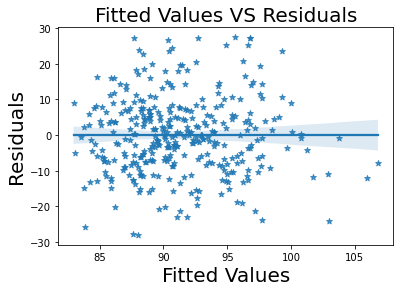

In [21]:
#%% Visualizar homocedasticidad 
plt.figure()
sns.regplot(Y_pred_2,error_2, data=diabetes, marker='*')
plt.xlabel('Fitted Values', size=20)
plt.ylabel('Residuals', size=20)
plt.title('Fitted Values VS Residuals', size=20)
plt.show()

In [22]:
#%% Forma Estadística de Homocedasticidad
#Breusch-Pagan
#H0: Homocedasticidad (p>0.05)
#H1: No homocedasticidad (p<0.05)
names=['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo_2.resid, X_2)
lzip(names, test)

[('Lagrange multiplier statistic', 1.649627278175478),
 ('p-value', 0.19900966811368093),
 ('f-value', 1.647982241071987),
 ('f p-value', 0.20008058310923496)]

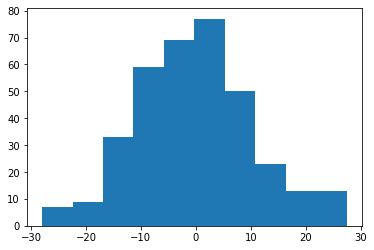

In [23]:
# Forma gráfica de la  normalidad de los residuos
plt.figure()
plt.hist(modelo_2.resid)
plt.show()

<Figure size 432x288 with 0 Axes>

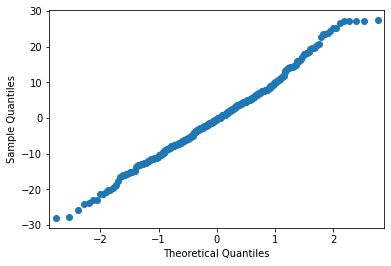

In [24]:
# QQ plot
plt.figure()
ax=sm.qqplot(modelo_2.resid)
plt.show()

<Figure size 432x288 with 0 Axes>

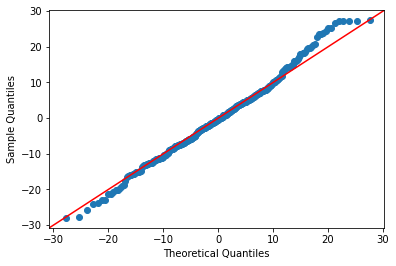

In [25]:
#%% QQ plot
plt.figure()

ax=sm.qqplot(modelo_2.resid, line='45',scale=10)
plt.show()

In [26]:
# Forma estadística de la normalidda (Shapiro-Wilk)
#Ho: Normalidad (p>0.05)
#H1: No normalidad (p<0.05)
names=[' Statistic', 'p-value']
test=stats.shapiro(modelo_2.resid)
lzip(names,test)

[(' Statistic', 0.9917600154876709), ('p-value', 0.04712102562189102)]

# Regresión lineal multivariable

In [27]:
#convertir pandas.dataframe en numpy.array
diabetes_array = diabetes.to_numpy()

In [28]:
# dimensiones del array
diabetes_array.shape

(442, 10)

In [29]:
# Glucosa como variable dependiente y el resto forman parte del modelo de variables 

X_1 = diabetes.drop(labels='glucosa', axis=1)
Y_1 = diabetes['glucosa']

##### Statsmodel

In [30]:
lm2 = sm.OLS.from_formula("glucosa ~ edad+sexo+imc+blood_pressure+total_serum_col+ldl+hdl+total_col+ltg", data=diabetes)

In [31]:
trained_lm2 = lm2.fit()

In [32]:
predictions = trained_lm2.predict(X_1)

In [33]:
summary_model = trained_lm2.summary()
print(summary_model)

                            OLS Regression Results                            
Dep. Variable:                glucosa   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     23.26
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           2.31e-32
Time:                        16:47:41   Log-Likelihood:                -1618.7
No. Observations:                 442   AIC:                             3257.
Df Residuals:                     432   BIC:                             3298.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          28.5347     11.795     

In [34]:
#%% Forma Estadística de Homocedasticidad
#Breusch-Pagan
#H0: Homocedasticidad (p>0.05)
#H1: No homocedasticidad (p<0.05)

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(trained_lm2.resid, trained_lm2.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 4.91045892703832),
 ('p-value', 0.8420428510764414),
 ('f-value', 0.5392534168610897),
 ('f p-value', 0.8458968504934645)]

#### Modelo considerando únicamente las variables significativas

In [35]:
lm3 = sm.OLS.from_formula("glucosa ~ edad+imc+blood_pressure", data=diabetes)

In [36]:
trained_lm3 = lm3.fit()

In [37]:
predictions = trained_lm3.predict(X_1)

In [38]:
summary_model_0 = trained_lm3.summary()
print(summary_model_0)

                            OLS Regression Results                            
Dep. Variable:                glucosa   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     47.40
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.51e-26
Time:                        16:47:41   Log-Likelihood:                -1643.9
No. Observations:                 442   AIC:                             3296.
Df Residuals:                     438   BIC:                             3312.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         47.6809      3.761     12.

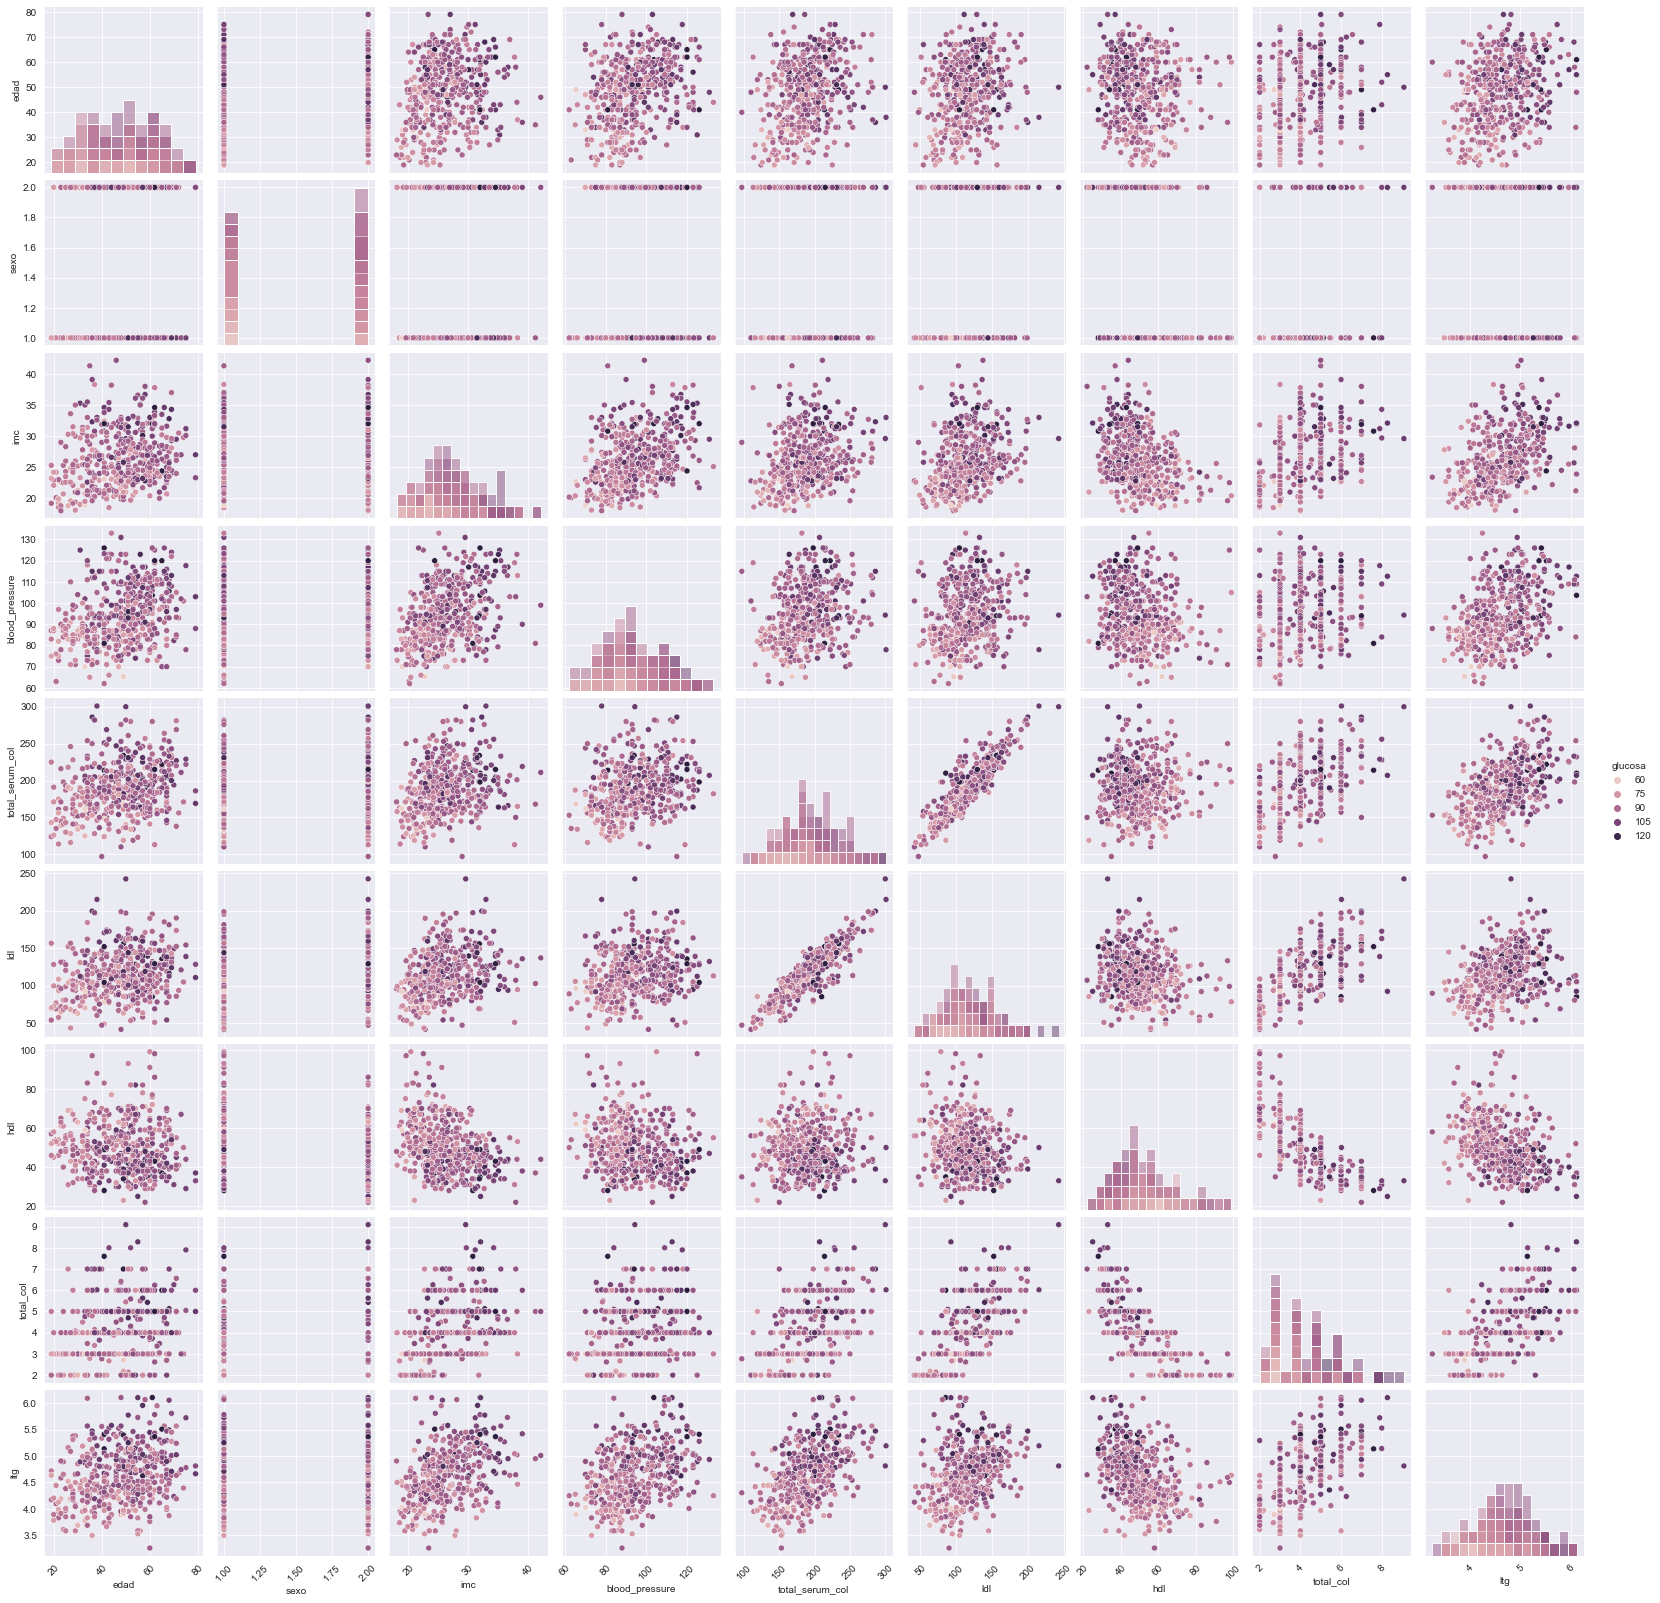

In [39]:
# Gráficas
sns.set_style('darkgrid')
datos = diabetes[['glucosa','edad','sexo','imc','blood_pressure','total_serum_col','ldl','hdl','total_col','ltg']]
g=sns.pairplot(datos, hue='glucosa', diag_kind='hist')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=45)